In [1]:
#https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c 

# load packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import sklearn

In [2]:
# load dataset

data = pd.read_csv(r'us_election_22.csv')
df = pd.DataFrame(data)
df.head(20)

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0
5,5,Adair,KY,0.806,0.161,8231.0,6637.0,1323.0,0.830,0.159,...,2.6,0.5,3.4,22.2,7988.0,74.1,15.8,9.9,0.1,6.2
6,6,Adair,MO,0.594,0.345,10137.0,6019.0,3495.0,0.618,0.358,...,4.0,2.6,4.0,17.1,11274.0,73.6,20.9,5.3,0.2,5.5
7,7,Adair,OK,0.735,0.212,6468.0,4753.0,1374.0,0.786,0.195,...,2.8,1.0,3.2,23.1,8130.0,71.6,20.4,7.5,0.5,5.5
8,8,Adams,CO,0.421,0.494,175125.0,73807.0,86471.0,0.404,0.567,...,1.2,1.1,5.0,29.2,246450.0,83.6,11.2,5.1,0.1,5.1
9,9,Adams,IA,0.669,0.271,2082.0,1393.0,565.0,0.708,0.273,...,3.3,0.8,5.3,19.6,1796.0,72.0,12.1,15.5,0.3,4.2


In [3]:
# Lets see what columns we have

df.columns

Index(['Unnamed: 0', 'county', 'state', 'percentage16_Donald_Trump',
       'percentage16_Hillary_Clinton', 'total_votes16', 'votes16_Donald_Trump',
       'votes16_Hillary_Clinton', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'lat', 'long', 'cases', 'deaths', 'TotalPop',
       'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [4]:
# remove the first column

df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.columns

Index(['county', 'state', 'percentage16_Donald_Trump',
       'percentage16_Hillary_Clinton', 'total_votes16', 'votes16_Donald_Trump',
       'votes16_Hillary_Clinton', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'lat', 'long', 'cases', 'deaths', 'TotalPop',
       'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [6]:
df.head()

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [7]:
#As we are not interested in analysing the 2016 election results, we will remove columns containing 'clinton' and '16' string

df = df[df.columns.drop(list(df.filter(regex='16')))]

In [8]:
df.columns

Index(['county', 'state', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'lat', 'long', 'cases', 'deaths', 'TotalPop',
       'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [9]:
# Remove columns refering to Clinton

df = df[df.columns.drop(list(df.filter(regex='Clinton')))]

In [10]:
#Lets begin to explore correlaltions between the features

df.corr(method= 'pearson')

,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
percentage20_Donald_Trump,1.000000,-0.998378,-0.173966,-0.104964,-0.205766,-0.053569,-0.065125,-0.313468,-0.302485,-0.357726,...,-0.047153,-0.191413,0.027206,-0.091770,-0.363515,-0.106510,-0.092740,0.327859,0.150612,-0.253466
percentage20_Joe_Biden,-0.998378,1.000000,0.179563,0.110478,0.211267,0.031574,0.083961,0.316188,0.307715,0.359351,...,0.036896,0.189985,-0.036431,0.103729,0.364900,0.110246,0.090991,-0.331841,-0.154118,0.264576
total_votes20,-0.173966,0.179563,1.000000,0.950153,0.983830,-0.059964,-0.025456,0.915934,0.729631,0.974939,...,-0.062257,0.071008,0.000464,0.156779,0.976020,0.214882,-0.158458,-0.153830,-0.084744,0.017257
votes20_Donald_Trump,-0.104964,0.110478,0.950153,1.000000,0.879009,-0.091768,0.005759,0.867621,0.658545,0.907675,...,-0.117317,0.038169,-0.019016,0.161648,0.904266,0.270573,-0.199876,-0.193723,-0.101430,0.007278
votes20_Joe_Biden,-0.205766,0.211267,0.983830,0.879009,1.000000,-0.040626,-0.039623,0.903996,0.740321,0.969829,...,-0.028231,0.086304,0.011204,0.147932,0.973336,0.173860,-0.128101,-0.124316,-0.071483,0.022759
lat,-0.053569,0.031574,-0.059964,-0.091768,-0.040626,1.000000,-0.730401,-0.026617,-0.002931,-0.054704,...,0.361865,-0.050002,0.368618,-0.265409,-0.042601,-0.028400,-0.129504,0.236584,0.162658,-0.337877
long,-0.065125,0.083961,-0.025456,0.005759,-0.039623,-0.730401,1.000000,-0.024620,0.028551,-0.007890,...,-0.299272,-0.151347,-0.314933,0.363665,-0.003723,0.347836,-0.201703,-0.329591,-0.185881,0.145667
cases,-0.313468,0.316188,0.915934,0.867621,0.903996,-0.026617,-0.024620,1.000000,0.820498,0.950111,...,-0.045359,0.062326,-0.025628,0.137251,0.943558,0.176179,-0.127759,-0.129996,-0.071848,0.039339
deaths,-0.302485,0.307715,0.729631,0.658545,0.740321,-0.002931,0.028551,0.820498,1.000000,0.812282,...,0.010441,0.060167,-0.030434,0.192319,0.806221,0.148072,-0.107667,-0.108721,-0.061485,0.057559
TotalPop,-0.357726,0.359351,0.974939,0.907675,0.969829,-0.054704,-0.007890,0.950111,0.812282,1.000000,...,-0.044073,0.037386,-0.012448,0.165033,0.997903,0.196302,-0.142955,-0.142333,-0.081148,0.028408


In [11]:
# What type of data types are we dealing with?

df.dtypes

county                        object
state                         object
percentage20_Donald_Trump    float64
percentage20_Joe_Biden       float64
total_votes20                float64
votes20_Donald_Trump         float64
votes20_Joe_Biden            float64
lat                          float64
long                         float64
cases                        float64
deaths                       float64
TotalPop                     float64
Men                          float64
Women                        float64
Hispanic                     float64
White                        float64
Black                        float64
Native                       float64
Asian                        float64
Pacific                      float64
VotingAgeCitizen             float64
Income                       float64
IncomeErr                    float64
IncomePerCap                 float64
IncomePerCapErr              float64
Poverty                      float64
ChildPoverty                 float64
P

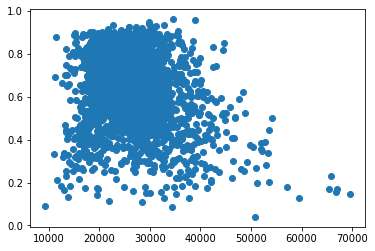

In [12]:
# Let's generate a scatterplot to compare income vs percentage20_Donald_Trump (HP1)

plt.scatter(x=df['IncomePerCap'], y=df['percentage20_Donald_Trump'])
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='IncomePerCap', ylabel='percentage20_Donald_Trump'>

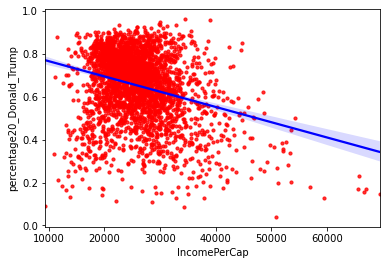

In [13]:
# Let's add a regression line to the scatterplot using seaborn.

sns.regplot(x='IncomePerCap', y='percentage20_Donald_Trump', data=df, \
            scatter_kws={'s':10, "color":"red"}, line_kws={"color":"blue"})


In [14]:
# County and state is not a numeric variable. But we can turn this nominal variables into a factor variable.
for col in df.columns:
    if(df[col].dtype == 'object'):
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
df

,county,state,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,40,0.661,0.330,12433.0,8215.0,4101.0,34.223334,-82.461707,805.0,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,3,18,0.795,0.191,28425.0,22596.0,5443.0,30.295065,-92.414197,3182.0,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,4,45,0.542,0.447,16938.0,9172.0,7578.0,37.767072,-75.632346,1227.0,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,8,13,0.504,0.465,259389.0,130699.0,120539.0,43.452658,-116.241552,17451.0,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,9,12,0.697,0.286,4183.0,2917.0,1197.0,41.330756,-94.471059,222.0,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,2680,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.1,2.8,3.8,11.0,4755.0,56.9,34.6,7.8,0.7,7.5
4863,2919,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.8,5.8,8.4,9.4,1095.0,52.5,32.3,12.5,2.6,7.0
4864,2929,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.9,5.0,4.2,6.5,377.0,45.6,44.0,10.3,0.0,6.5
4865,2947,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.8,19.2,8.0,8.4,2082.0,38.8,56.5,4.7,0.0,19.7


In [15]:
# Now I want to generate a df which sorts the most strongly correlated features with % who voted for Trump in 2020

x = df.corr(method= 'pearson')
x = pd.DataFrame(x['percentage20_Donald_Trump']\
                 .sort_values(ascending=False)\
                 .reset_index(level=0)\
                 .rename(columns = {'index':'features'}, inplace = False))

# remove other dependant variables from the df

x = x[~x['features'].isin(['percentage20_Joe_Biden', 'votes20_Joe_Biden', 'votes20_Donald_Trump', 'total_votes20'])]
x

,features,percentage20_Donald_Trump
0,percentage20_Donald_Trump,1.000000
1,White,0.526066
2,Construction,0.502097
3,IncomeErr,0.330866
4,SelfEmployed,0.327859
5,IncomePerCapErr,0.302558
6,Production,0.284247
7,Drive,0.172436
8,FamilyWork,0.150612
9,Carpool,0.093943


<AxesSubplot:xlabel='White', ylabel='percentage20_Donald_Trump'>

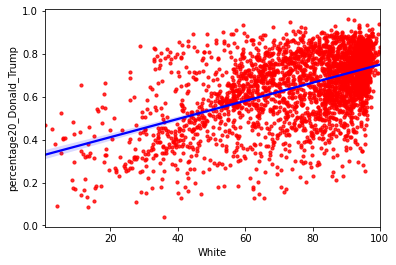

In [16]:
# Here is a scatterplot to show the correlation between counties with a high share of white ethnicity and voting for Trump. 

sns.regplot(x='White', y='percentage20_Donald_Trump', data=df, \
            scatter_kws={'s':10, "color":"red"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='Income', ylabel='percentage20_Donald_Trump'>

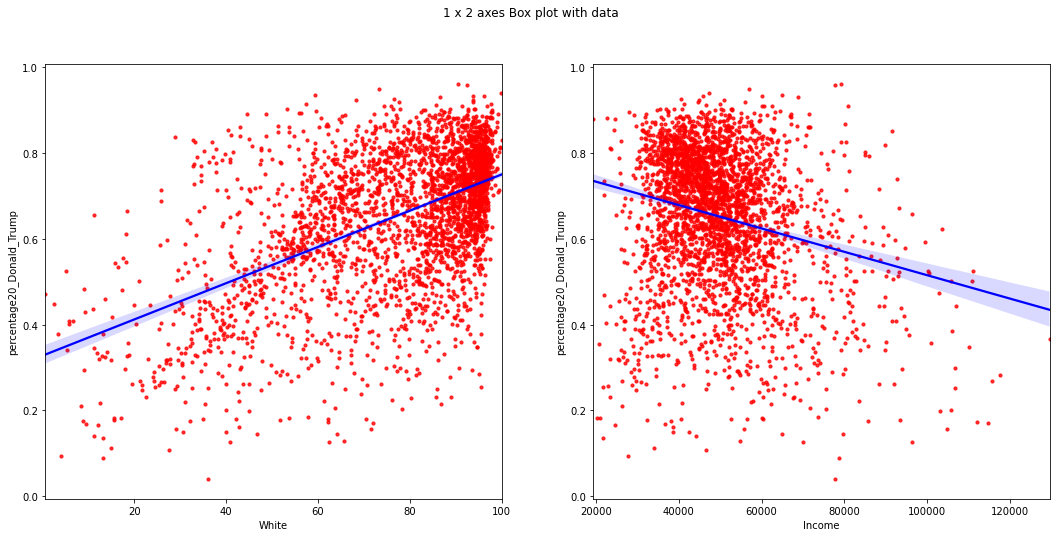

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
 
fig.suptitle('1 x 2 axes Box plot with data')
 
sns.regplot(ax=axes[0], x='White', y='percentage20_Donald_Trump',\
            data=df, scatter_kws={'s':10, "color":"red"}, line_kws={"color":"blue"})

sns.regplot(ax=axes[1], x='Income', y='percentage20_Donald_Trump', \
            data=df, scatter_kws={'s':10, "color":"red"}, line_kws={"color":"blue"})

# We can see that there is a strong correlation between lower incomes 
#and being white and voting for Donald Trump in the 2020 Election.

In [18]:
df.isnull().sum()

county                          0
state                           0
percentage20_Donald_Trump     377
percentage20_Joe_Biden        377
total_votes20                 234
votes20_Donald_Trump          234
votes20_Joe_Biden             234
lat                          1615
long                         1615
cases                        1615
deaths                       1615
TotalPop                     1725
Men                          1725
Women                        1725
Hispanic                     1725
White                        1725
Black                        1725
Native                       1725
Asian                        1725
Pacific                      1725
VotingAgeCitizen             1725
Income                       1725
IncomeErr                    1725
IncomePerCap                 1725
IncomePerCapErr              1725
Poverty                      1725
ChildPoverty                 1726
Professional                 1725
Service                      1725
Office        

In [19]:
missing_col = ['Income']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()


In [20]:
#Technique 1: Using mean to impute the missing values
def impute(df, col= []):
    for i in col:
        df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

impute(df, col=['SelfEmployed'])

In [21]:
impute(df, col=['White'])

In [22]:
impute(df, col=['percentage20_Donald_Trump'])

In [23]:
df.isnull().sum()

county                          0
state                           0
percentage20_Donald_Trump       0
percentage20_Joe_Biden        377
total_votes20                 234
votes20_Donald_Trump          234
votes20_Joe_Biden             234
lat                          1615
long                         1615
cases                        1615
deaths                       1615
TotalPop                     1725
Men                          1725
Women                        1725
Hispanic                     1725
White                           0
Black                        1725
Native                       1725
Asian                        1725
Pacific                      1725
VotingAgeCitizen             1725
Income                          0
IncomeErr                    1725
IncomePerCap                 1725
IncomePerCapErr              1725
Poverty                      1725
ChildPoverty                 1726
Professional                 1725
Service                      1725
Office        

In [24]:
r, p = sp.stats.pearsonr(df['Income'], df['percentage20_Donald_Trump'])

In [25]:
r

-0.16205425956609296

In [26]:
p

5.3873342567743274e-30

In [27]:
r, p = sp.stats.pearsonr(df['percentage20_Donald_Trump'], df['White'])

In [28]:
r

0.3740657003246317

In [29]:
p

1.7551251450279578e-161

In [30]:
# 

X = df[['SelfEmployed', 'White']]
y = df['percentage20_Donald_Trump']

In [31]:
from sklearn import linear_model

In [32]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [33]:
predicted = regr.predict([[7.8, 68.9]])
predicted

array([0.55710363])

In [34]:
X

,SelfEmployed,White
0,7.8,68.9
1,7.6,77.5
2,7.1,60.3
3,6.6,85.2
4,10.4,96.6
...,...,...
4862,7.8,70.2
4863,12.5,64.4
4864,10.3,43.7
4865,4.7,21.3


In [35]:
df.describe()

,county,state,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,4867.000000,4867.000000,4867.000000,4490.000000,4.633000e+03,4.633000e+03,4.633000e+03,3252.000000,3252.000000,3252.000000,...,3142.000000,3142.00000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,4867.000000,3142.000000,3142.000000
mean,1478.770906,25.354839,0.585702,0.394531,3.316812e+04,1.568986e+04,1.688328e+04,37.253007,-89.423304,2808.759225,...,3.235455,1.60331,4.802960,23.354870,4.793099e+04,75.069478,16.891025,7.758116,0.282368,6.364004
std,847.227075,13.712630,0.176512,0.180909,1.189115e+05,4.402918e+04,7.620998e+04,8.495808,20.533863,10522.552427,...,3.916257,1.68188,3.076183,5.638348,1.576220e+05,7.553859,6.276469,3.106714,0.451699,3.063165
min,0.000000,0.000000,0.000000,0.031000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-174.159600,0.000000,...,0.000000,0.00000,0.000000,5.100000,3.900000e+01,31.100000,4.400000,0.000000,0.000000,0.000000
25%,745.000000,16.000000,0.467500,0.245000,2.313000e+03,1.232000e+03,7.380000e+02,34.267613,-98.069475,216.750000,...,1.400000,0.90000,2.900000,19.600000,4.550500e+03,71.700000,12.700000,6.000000,0.100000,4.400000
50%,1469.000000,23.000000,0.585702,0.376000,7.461000e+03,4.343000e+03,2.413000e+03,38.172873,-89.916361,614.000000,...,2.300000,1.30000,4.100000,23.100000,1.069500e+04,76.300000,15.700000,7.758116,0.200000,6.100000
75%,2206.500000,38.000000,0.726000,0.524000,1.994700e+04,1.225800e+04,7.359000e+03,41.684466,-82.845025,1758.000000,...,3.800000,1.90000,5.800000,26.900000,2.951475e+04,80.300000,19.500000,7.758116,0.300000,7.800000
max,2951.000000,50.000000,0.962000,1.000000,4.139895e+06,1.107090e+06,2.947568e+06,69.314792,0.000000,309190.000000,...,59.200000,43.20000,33.000000,45.100000,4.805817e+06,88.800000,64.800000,38.000000,8.000000,28.800000


In [36]:
X = df[['SelfEmployed', 'White']]
y = df['percentage20_Donald_Trump']


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.3, random_state = 100)




In [37]:
mlr = linear_model.LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [38]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  0.23647844030443133
Coefficients:


[('SelfEmployed', 0.008398414655644901), ('White', 0.0037184926788209746)]

In [39]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print(f"Prediction for test set: {y_pred_mlr}")

Prediction for test set: [0.61240388 0.66642235 0.53883425 ... 0.54831149 0.54321447 0.50226016]


In [40]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
219,0.465000,0.612404
519,0.844000,0.666422
3024,0.732000,0.538834
4820,0.585702,0.587064
1694,0.505000,0.564301


In [41]:
#Model Evaluation

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))


print(f'R squared: {mlr.score(X,y)*100:.2f}')
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 16.28
Mean Absolute Error: 0.12633717115458706
Mean Square Error: 0.026008157103778788
Root Mean Square Error: 0.1612704470874276


In [42]:
# An r-squared of 16% reveals that 16% of the variability observed in the target variable 
# is explained by the regression model which is unsurprisingly low given I only used two features for the model.
# MEA measures the magnitude of difference between the prediction of an observation and the true value of that observation. 
# The model is off on average by 12% in predicting the share vote for Trump.
# Root mean squared error (RMSE) is the standard deviation of the errors which occur when a prediction is made on a dataset.. An RMSE of 0.16
# is a satisfactory score. 


In [43]:
# However the main issue is the low r-sq score. I will therefore add more features to the model.
# First I need to impute for the null values in the features I want to include in the model.

impute(df, col=['White', 'Carpool', 'Construction', 'IncomeErr',\
                'SelfEmployed', 'IncomePerCapErr', 'Production', 'Drive', 'FamilyWork', 'state', 'WorkAtHome' ])

df.isnull().sum()

county                          0
state                           0
percentage20_Donald_Trump       0
percentage20_Joe_Biden        377
total_votes20                 234
votes20_Donald_Trump          234
votes20_Joe_Biden             234
lat                          1615
long                         1615
cases                        1615
deaths                       1615
TotalPop                     1725
Men                          1725
Women                        1725
Hispanic                     1725
White                           0
Black                        1725
Native                       1725
Asian                        1725
Pacific                      1725
VotingAgeCitizen             1725
Income                          0
IncomeErr                       0
IncomePerCap                 1725
IncomePerCapErr                 0
Poverty                      1725
ChildPoverty                 1726
Professional                 1725
Service                      1725
Office        

<AxesSubplot:xlabel='FamilyWork', ylabel='percentage20_Donald_Trump'>

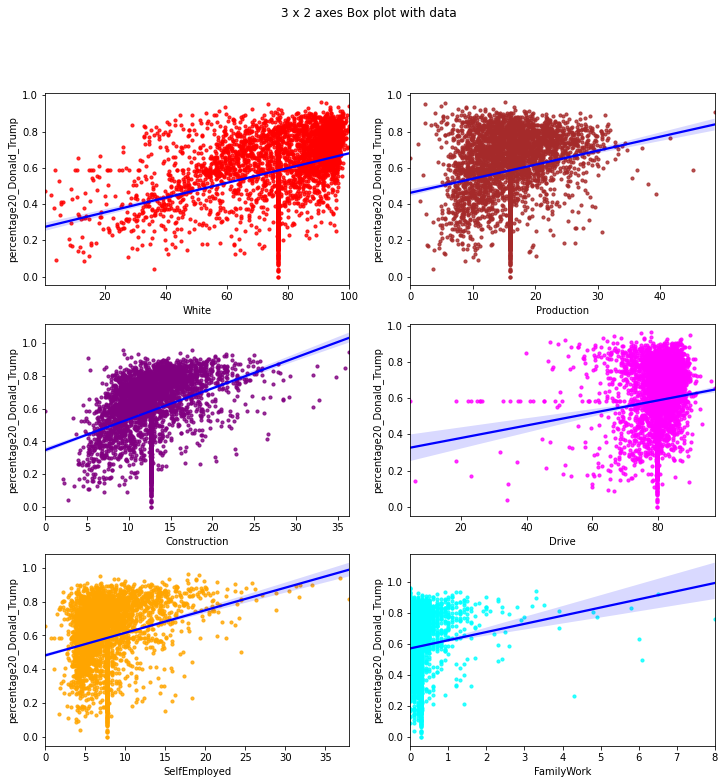

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('3 x 2 axes Box plot with data')
 
    
sns.regplot(ax=axes[0,0], x='White', y='percentage20_Donald_Trump',\
            data=df, scatter_kws={'s':10, "color":"red"}, line_kws={"color":"blue"})
sns.regplot(ax=axes[1,0], x='Construction', y='percentage20_Donald_Trump', \
            data=df, scatter_kws={'s':10, "color":"purple"}, line_kws={"color":"blue"})
sns.regplot(ax=axes[2,0], x='SelfEmployed', y='percentage20_Donald_Trump', \
            data=df, scatter_kws={'s':10, "color":"orange"}, line_kws={"color":"blue"})
sns.regplot(ax=axes[0,1], x='Production', y='percentage20_Donald_Trump', \
            data=df, scatter_kws={'s':10, "color":"brown"}, line_kws={"color":"blue"})
sns.regplot(ax=axes[1,1], x='Drive', y='percentage20_Donald_Trump', \
            data=df, scatter_kws={'s':10, "color":"magenta"}, line_kws={"color":"blue"})
sns.regplot(ax=axes[2,1], x='FamilyWork', y='percentage20_Donald_Trump', \
            data=df, scatter_kws={'s':10, "color":"cyan"}, line_kws={"color":"blue"})


In [45]:
X = df[['White', 'Construction', \
                'SelfEmployed', 'Production', 'Drive', 'FamilyWork']]
y = df['percentage20_Donald_Trump']


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.3, random_state = 100)



In [46]:
mlr = linear_model.LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [47]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  -0.28950923160085784
Coefficients:


[('White', 0.003443121032379604),
 ('Construction', 0.01739129672787194),
 ('SelfEmployed', 0.005431164534682554),
 ('Production', 0.005946457343608485),
 ('Drive', 0.003210392877756832),
 ('FamilyWork', 0.002288432429220545)]

In [48]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print(f"Prediction for test set: {y_pred_mlr}")

Prediction for test set: [0.53240544 0.64544809 0.60926419 ... 0.49909578 0.43412227 0.45355575]


In [49]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
219,0.465000,0.532405
519,0.844000,0.645448
3024,0.732000,0.609264
4820,0.585702,0.587338
1694,0.505000,0.516971


In [50]:
# We should now expect the r-sq value to be higher in the models Evaluation

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))


print(f'R squared: {mlr.score(X,y)*100:.2f}')
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 30.40
Mean Absolute Error: 0.11241137401823119
Mean Square Error: 0.021831852821531005
Root Mean Square Error: 0.14775605849348786


In [51]:
#We could create a function that changes the values of the features
# to predict for counties in the future with changing demographics:

def vote4trump_perc():
    
    white = float(input("What % of the county is of white ethnicity?"))
    construct = float(input("What % of the county works in construction?"))
    selfemp = float(input("What % of the county is selfemployed?"))
    product = float(input("What % of the county works in production?"))
    drive = float(input("What % of the county drives to work?"))
    famwork = float(input("What % of the county works in a family business?"))
    
    prediction = float(mlr.predict([[white, construct, selfemp, product, drive, famwork]]))
    
    print('The predicted % vote for Donald Trump in this country for the 2020 Election is: \n',\
          f'{prediction:.2f}%')
    
vote4trump_perc()



What % of the county is of white ethnicity?75
What % of the county works in construction?10
What % of the county is selfemployed?15.2
What % of the county works in production?7.8
What % of the county drives to work?5.1
What % of the county works in a family business?11.4
The predicted % vote for Donald Trump in this country is for the 2020 Election is: 
 0.31%
